In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#reading the csv file
df = pd.read_csv('2022yr.csv')

In [24]:
#dropping values with negative ride duration
df = df.drop(df[df['started_at'] > df['ended_at']].index)

In [25]:
#checking values with negative ride duration
df[df['started_at']>df['ended_at']]

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday


In [26]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,3
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,0
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,1
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,1
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522113 entries, 0 to 2522130
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   ride_id             object
 2   rideable_type       object
 3   started_at          object
 4   ended_at            object
 5   start_station_name  object
 6   end_station_name    object
 7   member_casual       object
 8   ride_length         object
 9   weekday             int64 
dtypes: int64(2), object(8)
memory usage: 211.7+ MB


In [28]:
#dropping unncessary columns
df = df.drop(['Unnamed: 0'], axis=1)

In [29]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,3


In [30]:
#usual conversions
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_length'] = pd.to_timedelta(df['ride_length'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522113 entries, 0 to 2522130
Data columns (total 9 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   end_station_name    object         
 6   member_casual       object         
 7   ride_length         timedelta64[ns]
 8   weekday             int64          
dtypes: datetime64[ns](2), int64(1), object(5), timedelta64[ns](1)
memory usage: 192.4+ MB


In [32]:
#Converting codes to name of day
dict_weeks={0 : 'Monday',1 : 'Tuesday',2 : 'Wednesday',3 : 'Thursday',4 : 'Friday',5 : 'Saturday',6 : 'Sunday'}
df['weekday']=df['weekday'].map(dict_weeks)

In [33]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,weekday
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,0 days 00:14:56,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,0 days 00:06:02,Thursday


In [34]:
df.describe()

,ride_length
count,2522113
mean,0 days 00:18:13.411324552
std,0 days 00:57:34.598260749
min,0 days 00:00:00
25%,0 days 00:06:21
50%,0 days 00:11:12
75%,0 days 00:20:16
max,23 days 20:34:04


In [35]:
#calculating ride length in minutes
df['ride_length_in_minutes'] = (df['ride_length'].dt.seconds + df['ride_length'].dt.days * 24 * 3600)/60


In [36]:
df.describe()

,ride_length,ride_length_in_minutes
count,2522113,2.522113e+06
mean,0 days 00:18:13.411324552,1.822352e+01
std,0 days 00:57:34.598260749,5.757664e+01
min,0 days 00:00:00,0.000000e+00
25%,0 days 00:06:21,6.350000e+00
50%,0 days 00:11:12,1.120000e+01
75%,0 days 00:20:16,2.026667e+01
max,23 days 20:34:04,3.435407e+04


Mean: 18.22 min

In [37]:
#EDA starts

median_ride_length = df['ride_length_in_minutes'].median()
mode_weekday = df['weekday'].mode()

In [40]:
median_ride_length

11.2

In [41]:
mode_weekday

0    Saturday
Name: weekday, dtype: object


People tend to ride most in Saturday.

There is a noticeable amount of variation in median and mean of ride lengths indicating that riding lengths vary quite significantly. There is no symmetric plot.

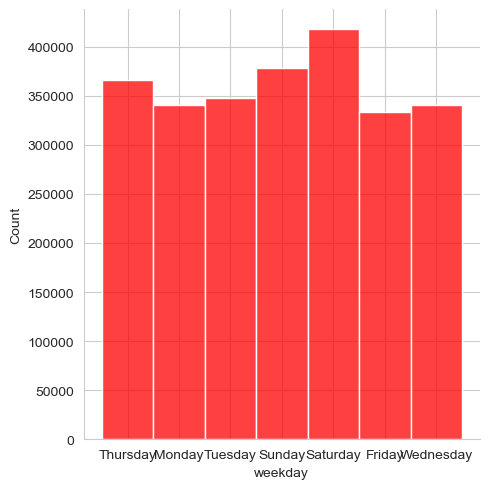

In [46]:
sns.set_style('whitegrid')
sns.displot(df['weekday'], kde = False, color ='red')

Just testing the graphs. All the plots will be made by using Tableau as it is simply better at this job.

In [47]:
#Mean ride length for members
df[df['member_casual']=='member'].ride_length.mean()

Timedelta('0 days 00:12:47.182500209')

In [48]:
#Mean ride length for casuals
df[df['member_casual']=='casual'].ride_length.mean()

Timedelta('0 days 00:25:47.989169301')

Casuals are riding way longer than members. While casuals may ride for longer distances (vacations) and hence increased trip duration. For members, the usage is typically limited to shorter distances. Members use this for daily trips (office/university to home) and this explains the increased time difference.

In [49]:
#Median_members
df[df['member_casual']=='member'].ride_length.median()

Timedelta('0 days 00:09:14')

In [50]:
#Median_casuals
df[df['member_casual']=='casual'].ride_length.median()

Timedelta('0 days 00:14:59')

Median also tells the same story

In [61]:
#Grouping data by weekdays
df2=df.groupby('weekday')
df2.first()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,ride_length_in_minutes
weekday,,,,,,,,,
Friday,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,Clinton St & Washington Blvd,member,0 days 00:07:23,7.383333
Monday,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:04:21,4.350000
Saturday,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,Damen Ave & Clybourn Ave,member,0 days 00:12:04,12.066667
Sunday,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,Broadway & Sheridan Rd,member,0 days 00:16:34,16.566667
Thursday,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,0 days 00:02:57,2.950000
Tuesday,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,0 days 00:04:21,4.350000
Wednesday,0AA241497B970400,classic_bike,2022-01-12 14:09:13,2022-01-12 14:10:53,LaSalle St & Jackson Blvd,Clark St & Ida B Wells Dr,member,0 days 00:01:40,1.666667


In [62]:
#Mean ride lengths by weekdays for casual and members
df.groupby(['weekday','member_casual']).ride_length.mean()

weekday    member_casual
Friday     casual          0 days 00:23:26.746262374
           member          0 days 00:12:22.739627527
Monday     casual          0 days 00:27:16.110117396
           member          0 days 00:12:26.386259266
Saturday   casual          0 days 00:28:26.361634881
           member          0 days 00:14:24.280067836
Sunday     casual          0 days 00:28:54.564607637
           member          0 days 00:14:18.970566727
Thursday   casual          0 days 00:23:10.761626614
           member          0 days 00:12:20.816354299
Tuesday    casual          0 days 00:23:02.318159429
           member          0 days 00:12:01.843053062
Wednesday  casual          0 days 00:22:21.949765625
           member          0 days 00:12:03.958548531
Name: ride_length, dtype: timedelta64[ns]

People tend to ride for more durations during weekends

In [63]:
#no. of trips per day for member and casual

df.groupby(['weekday']).ride_id.count()

weekday
Friday       333185
Monday       340387
Saturday     417329
Sunday       378095
Thursday     365671
Tuesday      347453
Wednesday    339993
Name: ride_id, dtype: int64

People tend to ride more during weekends

In [64]:
#extracting months
df['month'] = pd.DatetimeIndex(df['started_at']).month

In [65]:
#grouping data by months
df.groupby(['month']).ride_id.count()

month
1     80128
2     89178
3    215981
4    272560
5    502545
6    620348
7    642666
8     98707
Name: ride_id, dtype: int64

During cold months, people tend to ride less as compared to warm months

In [66]:
#no. of trips by months for casual and members
df.groupby(['month','member_casual']).ride_id.count()

month  member_casual
1      casual            12605
       member            67523
2      casual            15144
       member            74034
3      casual            67154
       member           148827
4      casual            91897
       member           180663
5      casual           220246
       member           282299
6      casual           292067
       member           328281
7      casual           311670
       member           330996
8      casual            42981
       member            55726
Name: ride_id, dtype: int64

The disparity in ride numbers between casuals and members is seen during cold months. In warm months, very minimal disparity is shown.

In [67]:
#no. of rides per category for casual and members
df.groupby(['rideable_type','member_casual']).ride_id.count()

rideable_type  member_casual
classic_bike   casual            569044
               member           1004335
docked_bike    casual            113037
electric_bike  casual            371683
               member            464014
Name: ride_id, dtype: int64

Most preffered type of bike is classical bike among both casuals and members.
Least preffered is docked bike.

In [68]:
df['Hour'] = df['started_at'].dt.hour

In [69]:
df.groupby(['Hour']).ride_id.count()

Hour
0      33733
1      20783
2      12043
3       7020
4       6289
5      20160
6      53310
7     100139
8     120036
9      92906
10    100023
11    126367
12    147150
13    149148
14    152671
15    174565
16    220533
17    261822
18    219663
19    163824
20    118095
21     93675
22     75908
23     52250
Name: ride_id, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522113 entries, 0 to 2522130
Data columns (total 12 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   ride_id                 object         
 1   rideable_type           object         
 2   started_at              datetime64[ns] 
 3   ended_at                datetime64[ns] 
 4   start_station_name      object         
 5   end_station_name        object         
 6   member_casual           object         
 7   ride_length             timedelta64[ns]
 8   weekday                 object         
 9   ride_length_in_minutes  float64        
 10  month                   int64          
 11  Hour                    int64          
dtypes: datetime64[ns](2), float64(1), int64(2), object(6), timedelta64[ns](1)
memory usage: 250.1+ MB


In [71]:
#finalized data for tableau visualization
df.to_csv('Finalized.csv')
